<a href="https://colab.research.google.com/github/charlie-paterson/Grow-Intern/blob/main/Movie%20Recommendation%20System/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.decomposition import TruncatedSVD
import textwrap
UNDERLINE = "\033[4m"
RESET = "\033[0m"
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Loading the Dataset

In [2]:
df = pd.read_csv('movies.csv')
df2 = df.copy()
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# Exploratory Data Analysis

### Cleaning

In [3]:
df2.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [4]:
df2.shape
print(f"The dataset has {df2.shape[0]} rows and {df2.shape[1]} columns")

The dataset has 4803 rows and 24 columns


In [5]:
df.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [6]:
df = df.fillna(' ')

In [7]:
df.isnull().sum()

,0
index,0
budget,0
genres,0
homepage,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0


In [8]:
df.describe()

,index,budget,id,popularity,revenue,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000


### Movie Details

In [9]:
def get_movie_details(title, df):
  title = title.lower()
  index = df.index[df['title'].str.lower() == title]

  if not index.size:
        return f"No details found for the movie titled '{title}'."

  movie_details = df2.iloc[index[0]]
  overview_wrapped = textwrap.fill(movie_details['overview'], width=100)

  details = (
        f"{BLUE}Title:{RESET} {movie_details['title']}\n"
        f"{BLUE}Genre:{RESET} {movie_details['genres']}\n"
        f"{BLUE}Overview:{RESET} {overview_wrapped}\n"
        f"{BLUE}Average Rating:{RESET} {movie_details['vote_average']}\n"
        f"{BLUE}Running Time:{RESET} {movie_details['runtime']} mins\n"
        f"{BLUE}Released:{RESET} {movie_details['release_date']}\n"
        f"{BLUE}Cast:{RESET} {movie_details['cast']}"
  )

  return details

In [10]:
user_input = input("Enter the movie title: ")
print(" ")
print(get_movie_details(user_input, df))

Enter the movie title: toy story
 
Title: Toy Story
Genre: Animation Comedy Family
Overview: Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto
the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when
circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their
differences.
Average Rating: 7.7
Running Time: 81.0 mins
Released: 1995-10-30
Cast: Tom Hanks Tim Allen Don Rickles Jim Varney Wallace Shawn


### Top 10 Movies by Genre

In [11]:
def get_top_rated_movies_by_genre(df, genre, count=10):
    genre = genre.lower()

    df_genres = df2.assign(genres=df['genres'].str.split(', ')).explode('genres')
    df_filtered = df_genres[df_genres['genres'].str.lower() == genre]
    df_sorted = df_filtered.sort_values(by='vote_average', ascending=False)

    top_movies = df_sorted.head(count)

    top_movies_list = list(top_movies[['title', 'vote_average']].itertuples(index=False, name=None))

    return top_movies_list

In [31]:
user_genre = input("Enter the genre: ")
top_rated_movies = get_top_rated_movies_by_genre(df, user_genre, count=10)
print(" ")
print(f"Top rated movies by {user_genre} genre:")
for movie in top_rated_movies:
    print(f"{BLUE}{movie[0]}{RESET} | {movie[1]}/10")

Enter the genre: comedy
 
Top rated movies by comedy genre:
Little Big Top | 10.0/10
Stiff Upper Lips | 10.0/10
Dream with the Fishes | 7.7/10
Clerks | 7.4/10
The Hangover | 7.2/10
The Intern | 7.1/10
St. Vincent | 7.1/10
Airplane! | 7.1/10
Trading Places | 7.1/10
Janky Promoters | 7.0/10


### Highest Runtime by Genre

In [13]:
def get_highest_runtime_by_genre(df, genre, count=10):
    genre = genre.lower()

    df_genres = df2.assign(genres=df['genres'].str.split(', ')).explode('genres')
    df_filtered = df_genres[df_genres['genres'].str.lower() == genre]
    df_sorted = df_filtered.sort_values(by='runtime', ascending=False)

    top_movies = df_sorted.head(count)

    top_runtime_list = list(top_movies[['title', 'runtime']].itertuples(index=False, name=None))

    return top_runtime_list

In [30]:
user_genre = input("Enter the genre: ")
top_rated_movies = get_highest_runtime_by_genre(df, user_genre, count=10)
print(" ")
print(f"Top rated movies by {user_genre} genre:")
for movie in top_rated_movies:
    print(f"{BLUE}{movie[0]}{RESET} | {movie[1]} mins")

Enter the genre: action
 
Top rated movies by action genre:
Alatriste | 145.0 mins
Furious 7 | 137.0 mins
Maze Runner: The Scorch Trials | 132.0 mins
State of Play | 127.0 mins
Stealth | 121.0 mins
Driven | 116.0 mins
Criminal | 113.0 mins
The Bounty Hunter | 110.0 mins
Out of Inferno | 107.0 mins
Risen | 107.0 mins


# Feature Engineering

In [15]:
df['all'] = df['title'] + ' ' + df['genres'] + ' ' + df['keywords'] + ' ' + df['cast'] + ' ' + df['director']

In [16]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [PorterStemmer().stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['all'] = df['all'].apply(preprocess)

In [17]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,all
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,avatar action adventur fantasi scienc fiction ...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,pirat caribbean world end adventur fantasi act...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spectr action adventur crime spi base novel se...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dark knight rise action crime drama thriller d...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,john carter action adventur scienc fiction bas...


In [18]:
df = df[['title', 'genres', 'keywords', 'cast', 'director', 'all']]
df

,title,genres,keywords,cast,director,all
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,avatar action adventur fantasi scienc fiction ...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,pirat caribbean world end adventur fantasi act...
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,spectr action adventur crime spi base novel se...
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,dark knight rise action crime drama thriller d...
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,john carter action adventur scienc fiction bas...
...,...,...,...,...,...,...
4798,El Mariachi,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,el mariachi action crime thriller unit state u...
4799,Newlyweds,Comedy Romance,,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,newlyw comedi romanc edward burn kerri bish u0...
4800,"Signed, Sealed, Delivered",Comedy Drama Romance TV Movie,date love at first sight narration investigati...,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,sign seal deliv comedi drama romanc tv movi da...
4801,Shanghai Calling,,,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,shanghai call daniel henney eliza coup bill pa...


# Training

### Count Vectorizer

In [19]:
vectorizer_co = CountVectorizer(stop_words='english', min_df=20)
word_matrix_co = vectorizer_co.fit_transform(df['all'])
word_matrix_co.shape

(4803, 946)

In [20]:
feature_names_co = vectorizer_co.get_feature_names_out()
print(feature_names_co[:10])

['1970' '3d' 'aaron' 'abus' 'action' 'adam' 'addict' 'adult' 'adulteri'
 'adventur']


In [21]:
dense_matrix_co = word_matrix_co.toarray()
print(dense_matrix_co[:5, :5])

[[0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


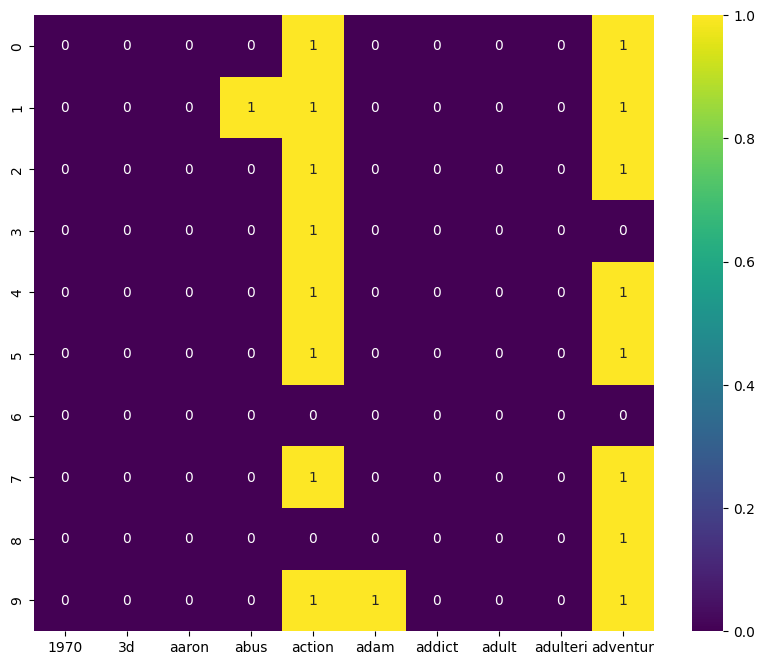

In [22]:
df_matrix_co = pd.DataFrame(dense_matrix_co, columns=feature_names_co)
plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix_co.iloc[:10, :10], cmap='viridis', annot=True)
plt.show()

In [23]:
similarity_score_co = cosine_similarity(word_matrix_co)

### Tfid Vectorizer

In [24]:
vectorizer_tf = TfidfVectorizer(stop_words='english', min_df=10, ngram_range=(1, 2))
word_matrix_tf = vectorizer_tf.fit_transform(df['all'])
word_matrix_tf.shape

(4803, 2876)

In [25]:
feature_names_tf = vectorizer_tf.get_feature_names_out()
print(feature_names_tf[:10])

['1970' '3d' 'aaron' 'aaron eckhart' 'abigail' 'abigail breslin' 'abraham'
 'abus' 'accid' 'accus']


In [26]:
svd = TruncatedSVD(n_components=100)
word_matrix_reduced = svd.fit_transform(word_matrix_tf)

In [27]:
similarity_score_tf = cosine_similarity(word_matrix_reduced)

# Recommendation System

In [28]:
def get_recommendations(title, df, similarity_score_tf, count=10):
    title = title.lower()
    indexes = df.index[df['title'].str.lower() == title]

    if not indexes.size:
        return []

    all_similarities = []

    for index in indexes:
        similarities = similarity_score_tf[index]
        all_similarities.extend([(i, similarity) for i, similarity in enumerate(similarities)])

    similar_items = pd.DataFrame(all_similarities, columns=['index', 'similarity'])
    similar_items = similar_items.drop_duplicates().sort_values(by='similarity', ascending=False)

    top_recs = similar_items.iloc[1:count+1]

    recommendations = df.iloc[top_recs['index']][['title']]
    recommendations['similarity'] = np.round(top_recs['similarity'].values * 100, 2)

    recommendations_list = []
    for row in recommendations.itertuples(index=False):
        title = row.title
        similarity_score = float(row.similarity)  # Ensure similarity_score is a float
        recommendations_list.append((title, similarity_score))

    return recommendations_list

In [29]:
title = input("Enter the title of the item you want recommendations for: ")
recommendations_list = get_recommendations(title, df, similarity_score_tf)
print(" ")
print(f"{RED}{UNDERLINE}Recommendations:{RESET}")
for title, score in recommendations_list:
    color = GREEN if score > 50 else RED
    print(f"{BLUE}{title}{RESET} | {color}{score:.2f}%{RESET}")

Enter the title of the item you want recommendations for: toy story
 
Recommendations:
Toy Story 2 | 94.03%
Toy Story 3 | 82.58%
Hop | 63.47%
The SpongeBob SquarePants Movie | 62.74%
Rugrats in Paris: The Movie | 60.68%
The Polar Express | 57.99%
Rugrats Go Wild | 57.20%
The SpongeBob Movie: Sponge Out of Water | 56.42%
Yogi Bear | 55.64%
Cradle Will Rock | 55.53%
